# Result Analysis

####  测试日期

2018-05-24

#### 相关模型：

+  DSSM
+  TFIDF
+  TOPIC

#### 原始匹配语料库： 

全量问题 + 全部同义句

#### 测试数据

@晓梅 给到samples.xls的数据中的100个银行相关问题 + 1条非银行相关问题， 这条问题主要是为了检测非银行问题搜索的性能。 

## 整体正确率

In [1]:
import  matplotlib.pyplot as plt

In [2]:
import time

In [3]:
import pandas as pd
%matplotlib inline

values = ['wrong', 'right', 'unsure']

def give_result_global_info(dataframe):
    dataframe.right.value_counts().plot(kind='pie')
    ratios = []
    for v in values:
        r = len(dataframe[dataframe.right == v]) / len(dataframe) 
        print('{}: {}%'.format(v, r * 100))
        ratios.append(v)
    assert len(ratios) == 3
    return ratios

In [4]:
result = pd.read_csv('data/result_100.csv-2018-05-23-03-tst-all-question.csv')

wrong: 68.97689768976898%
right: 28.38283828382838%
unsure: 2.6402640264026402%


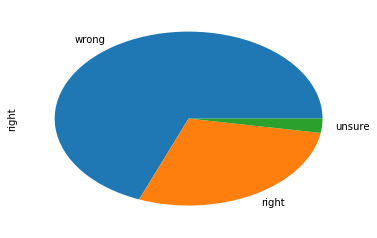

In [5]:
ratios = give_result_global_info(result)

## Wrong Ratio, Right Ratio, Unsure Ratio

#### 其中， 102个问题， 3个模型， 结果总体为 68.98% 错误, 23.38% 正确， 2.6% 未知

## 分模型分析

In [6]:
dssm_result = result[result.model == 'dssm']

wrong: 98.01980198019803%
right: 1.9801980198019802%
unsure: 0.0%


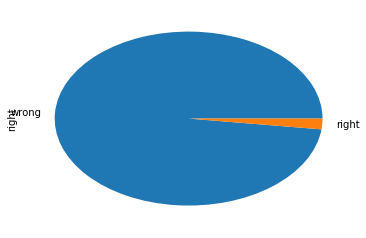

In [7]:
ratios_d = give_result_global_info(dssm_result)

wrong: 76.23762376237624%
right: 19.801980198019802%
unsure: 3.9603960396039604%


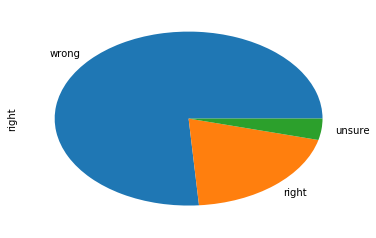

In [8]:
tfidf = result[result.model == 'tfidf']
ratios_t = give_result_global_info(tfidf)

wrong: 32.67326732673268%
right: 63.366336633663366%
unsure: 3.9603960396039604%


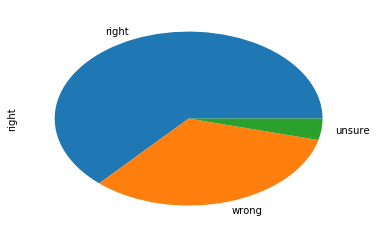

In [9]:
topic = result[result.model == 'topic']
ratios_tp = give_result_global_info(topic)

### 错误、正确结果分模型分析

In [10]:
dssm_result[dssm_result['right'] == 'right']

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
22,大额存单的最低起购金额,dssm,什么是“悦生活”,“悦生活”的网址,什么是保险类别？,保险类别,如何注销龙商户,如何注销电话银行,注销电话银行,手机银行怎样注销,...,注销手机银行,实物金价格表,实物金价目表,快捷支付注销,后退,手机银行咋个注销,如何注销龙支付,保险类别有哪些,保险类别是什么,right
40,财富贷有什么用,dssm,“悦生活”的网址,什么是“悦生活”,准贷记卡有哪几种,下载安装手机银行手机银行,感激涕零,手机银行一半怎样下载安装,什么是财富卡,什么是套算汇率,...,怎么下载安装手机银行,保险类别有哪些,保险类别是什么,保险类别,什么是保险类别？,实物金价格表,实物金价目表,财富贷,财富之星是什么,right


In [11]:
tfidf[tfidf['right'] == 'right'].sample(10)

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
224,在线申请信用卡的方法,tfidf,信用卡账单分期申请方法,查询信用卡申请进度方法,信用卡不能申请购车分期,账单分期申请方法,申请信用卡条件,信用卡申请账单分期优惠,非会员网络申请联名信用卡,停用信用卡方法,...,龙卡益贷信用卡自动分期申请金额限制,申请信用卡账单分期,信用卡账单分期申请,申请信用卡被拒儿,设置信用卡密码方法,解锁信用卡方法,申请信用卡,手机网申请信用卡条件,申请信用卡约定还款,right
242,有没有信用卡自动还款,tfidf,美元还款信用卡,龙卡人民币信用卡澳大利亚地区客服电话,信用卡免息期计算,信用卡特殊之处,信用卡销户是否退还溢缴款,信用卡网上交易时应注意些,信用卡消费时间入账,信用卡到期更换后密码会变动,...,信用卡何时会收到退款,ATMCRS还信用卡入账多久,ATMCRS还信用卡多久入账,注册为信用卡网站实名客户享受便利,电话银行信用卡还款,ATMCRS还信用卡实时入账,ATMCRS信用卡还款入账时间,信用卡激活是否允许代办,信用卡具备优点,right
194,能否使用网银查询贷款信息,tfidf,安全地使用建行网银,网银查询贷款信息,网银查询修改撤消黄金定投计划,网银查询账户变动短信通知签约状态,查询网银证书是否过期,网银查询养老保险金账户信息,网银基金客户历史交易明细查询,网银证书使用期限限制,...,网银提前还款进度查询,查询网银交易明细操作步骤,查询网银交易明细,网银查询黄金买卖编号,网银黄金定投历史交易明细查询,查询修改网银签约手机号码,使用网银短信动态口令,网银查询账号,咋个查询网银交易明细,right
29,PAD银行账户查询功能说明,tfidf,PAD银行信用卡还款查询功能说明,PAD银行账户查询功能,短信银行查询交易明细,发短信查询短信银行是否欠费,银行联行号查询,PAD银行账户查询内容,PAD银行悦生活缴费说明,微信银行查询周边网点功能说明,...,PAD银行查询账户类型,微信银行查询账户明细功能说明,查询短信银行功能,PAD银行中的悦生活说明,银行支票说明,查询银行联行号,短信银行免费试用期说明,查询外汇汇款银行SWIFTCODE,PAD银行注意说明,right
197,网银怎样查询贷款信息,tfidf,网银查询账号,网银查询账户明细,查询网银自助购汇还款,网银查询贷款信息,网银提前还款进度查询,网银查询公积金账户,咋个查询网银交易明细,网银中他行授权建行查询签约,...,网银黄金交易型开放式指数基金交易明细查询,网银基金客户历史交易明细查询,网银查询账户余额,查询修改网银签约手机号码,查询网银绑定手机号码,网银查询修改撤消黄金定投计划,查询网银交易明细操作步骤,查询网银交易明细,查询网银证书是否过期,right
104,个人网银申请借记卡方法,tfidf,个人网银存入定期存款方法,登录个人网银方法,个人网银咋样申请退保,个人网银追加新账户方法,个人网银实时买入账户贵金属方法,个人网银申请龙卡E付卡,个人网银追加新账户方法,个人网银申请快贷业务,...,个人网银办理账户贵金属交易方法,删除个人网银账户方法,个人网银存入或支取通知存款方法,个人网银申请退保,注销个人网银方法,个人网银预约医院专家挂号方法,个人网银维护收款人名册方法,个人网银咋个申请退保,首次登录个人网银方法,right
143,挂失卡号更变说明,tfidf,挂失补发说明,挂失有效期说明,芒果旅行龙卡到期或挂失后芒果网会员积分处理,电话银行定义说明,基金定投到期赎回说明,基金定投到期后处理说明,挂失补发所需资料,网银盾挂失,...,挂失通知存款账户,电话银行挂失功能说明,挂失解冻功能说明,挂失动态口令卡,POS刷外币说明,挂失影响范围,挂失后卡号会变动,实物贵金属提货说明,支票挂失,right
245,什么是信用卡自动还款,tfidf,美元还款信用卡,龙卡人民币信用卡澳大利亚地区客服电话,信用卡免息期计算,信用卡特殊之处,信用卡销户是否退还溢缴款,信用卡网上交易时应注意些,信用卡消费时间入账,信用卡到期更换后密码会变动,...,信用卡何时会收到退款,ATMCRS还信用卡入账多久,ATMCRS还信用卡多久入账,注册为信用卡网站实名客户享受便利,电话银行信用卡还款,ATMCRS还信用卡实时入账,ATMCRS信用卡还款入账时间,信用卡激活是否允许代办,信用卡具备优点,right
107,个人网银申请借记卡功能说明,tfidf,个人网银申请龙卡E付卡,个人网银申请退保,个人网银申请储蓄卡,网银办理个人业务预约说明,个人网银购房规划功能操作步骤,个人网银定制首页常用功能,个人网银功能,个人网银签约借贷通功能条件,...,个人网银账户功能设置,个人网银咋样申请退保,个人网银咋个申请退保,个人网银申请快贷业务,通过个人网银申请信贷,个人网银申请信用卡损坏换卡,个人网银申请信用卡分期,个人网银使用说明,个人网银申请信用卡,right
188,注销PAD银行的途径有哪些,tfidf,改接收银行短信手机号码,贵州客户接收外汇汇入汇款向汇款银行提供信息,注销PAD银行,PAD银行保证安全,广东客户接收外汇汇入汇款向汇款银行提供信息,PAD银行安全性问题,补缴短信银行服务费,短信银行释义,...,PAD银行查看定期存款,青海客户接收外汇汇入汇款向汇款银行提供信息,PAD银行看不到定期存款,短信银行欠费宽限期内是否会自动补扣,鑫存管证券转银行银转证,银行本票提示付款时间,银行外汇牌价,PAD银行特点,银行余额,right


In [12]:
topic[topic['right'] == 'right'].sample(10)

,input,model,top0,top1,top10,top11,top12,top13,top14,top15,...,top19,top2,top3,top4,top5,top6,top7,top8,top9,right
105,个人网银申请借记卡功能说明,topic,个人网银申请借记卡,储蓄卡如何开通个人网上银行,个人网银如何申请信用卡损坏换卡,个人网银如何注销短信转账功能,私人网银购房规划功能的操作步骤,如何通过柜台注销个人网上银行,个人网银如何注销短信缴费功能,个人网银如何开通ATM转账功能,...,个人网银上进行的账户挂失有没有有效期,个人网银功能,如何在个人网银办理借记卡自动绑定还款功能,个人网银“账户功能设置”是什么,私人网银教育规划功能的操作步骤,个人可申请几张借记卡,个人网银上进行的账户挂失长期有效吗,如何设置个人网银初始密码,个人网银上进行的账户挂失多久有效,right
132,挂失卡号会改变吗,topic,挂失后卡号会变吗,挂失卡号是否更变,换卡时卡号是否可以不变,补办的信用卡卡号是不是会改变,补卡/换卡能否保留原卡号,补办的信用卡卡号会不会改变,补办的信用卡卡号是否会改变,信用卡到期换卡是否变更卡号,...,补/换卡能否保留原卡号,不记得信用卡卡号，如何挂失,银行卡挂失补卡是否变更卡号,挂失换卡号，旧卡号还继续扣短信服务费吗？,补办的信用卡卡号一定会改变吗？,借记卡补卡时卡号可以保持不变吗,补办的信用卡卡号会改变吗,信用卡卡号不满意，能否更换卡号,补办的信用卡卡号肯定会改变吗？,right
123,口头/临时挂失的方法,topic,修改初始密码的方法,挂失解冻的方法,通过短信挂失的话，是属于哪种挂失方式？,VISA卡的使用方法,修改/重置龙支付密码的方法,定活两便转理财的方法,电子渠道不动户激活的方法,临时额度的调整方法,...,退保的方法,取消挂失（解挂）的方法,账单分期的申请方法有哪些？,怎么进行口头挂失,修改初始密码的方式,我每次转账的时候都要回复输入确认码来确认，很麻烦，有没更简洁的回复方式来完成付款？,易存金的定义,什么是附加码,借记卡综合积分的使用方法,right
27,PAD银行账户查询功能说明,topic,PAD银行账户查询功能,PAD银行账户怎么查询内容,PAD银行查询账户类型的方式,PAD银行账户查询操作,我可以用PAD银行账户查询内容吗,微信银行查询账户明细功能说明,查询短信银行功能,手机银行账户查询的介绍,...,怎样使用微信银行查询账户明细,PAD银行账户查询内容,PAD银行账户可否查询内容,PAD银行账户能不能查询内容,PAD银行查询账户类型,PAD银行账户怎样查询内容,PAD银行可以查询哪些账户类型,PAD银行可以查询账户类型吗,怎样在PAD银行查询账户类型,right
135,为什么挂失卡号要更变,topic,挂失卡号是否更变,挂失后卡号会变吗,补卡/换卡能否保留原卡号,补办的信用卡卡号会改变吗,补办的信用卡卡号是不是会改变,补办的信用卡卡号会不会改变,补办的信用卡卡号是否会改变,95533动态口令卡挂失是否为正式挂失,...,挂失补卡后签约关系会改变吗,不记得信用卡卡号，如何挂失,银行卡挂失补卡是否变更卡号,挂失换卡号，旧卡号还继续扣短信服务费吗？,换卡时卡号是否可以不变,借记卡补卡时卡号可以保持不变吗,信用卡卡号不满意，能否更换卡号,补办的信用卡卡号一定会改变吗？,补办的信用卡卡号肯定会改变吗？,right
216,能否在线申请信用卡,topic,网上如何申请信用卡,在线申请信用卡,哪些客户可以在网上申请信用卡,如何申请信用卡,可以在网上申办信用卡吗,信用卡账单分期能否多次申请,我可以申请信用卡吗,网上可以申请信用卡未出账单分期吗？,...,信用卡申请,怎样申请信用卡,能否停用信用卡,网上如何申请信用卡消费分期,如何在网上挂失信用卡？,信用卡可以在网上挂失吗,信用卡网站如何进行信用卡开卡,什么是信用卡网上还款,信用卡能否提前续卡,right
201,网银查询贷款信息功能说明,topic,网银查询贷款信息,个人网银如何查询贷款信息,网银如何查询已结清贷款,个人网银如何查询E商贸通信息,公积金类账户网站查询服务可以查询哪些信息？,如何在网站查询储蓄账户信息，查询信息包括哪些,个人网银“支票查询”可查询到哪些信息,个人网银如何查询预约缴费信息,...,个人网银查询账户信息的方法,如何查询贷款的基本信息,贷款信息查询,如何查询个人贷款的基本信息,贷款账单信息查询,我可以通过网上银行修改我的贷款信息吗？,个人网银如何查询保单信息,如何通过网银查询账户信息,个人网银可查询多久的信用卡对账信息,right
192,能否使用网银查询贷款信息,topic,网银查询贷款信息,个人网银如何查询贷款信息,贷款账单信息查询,个人网银如何查询保单信息,个人网银“支票查询”可查询到哪些信息,个人网银如何查询支票保付信息,通过网上银行查询的贷款账户一定要签约网上银行服务吗？,个人网银如何查询“AA收款”信息,...,如何查询贷款行的联系电话,我可以通过网上银行修改我的贷款信息吗？,个人网银能否查询联名贷款,如何查询贷款的基本信息,如何查询个人贷款的基本信息,贷款信息查询,网银如何查询已结清贷款,个人网银可查询多久的信用卡对账信息,网上银行的个人贷款查询受时间限制吗？,right
141,挂失卡号更变说明,topic,挂失卡号是否更变,挂失后卡号会变吗,补办的信用卡卡号一定会改变吗？,补办的信用卡卡号肯定会改变吗？,补办的信用卡卡号是否会改变,借记卡补卡时卡号可以保持不变吗,补办的信用卡卡号会改变吗,补办的信用卡卡号是不是会改变,...,补办的信用卡卡号改变的要求,不记得信用卡卡号，如何挂失,银行卡挂失补卡是否变更卡号,挂失换卡号，旧卡号还继续扣短信服务费吗？,信用卡卡号不满意，能否更换卡号,换卡时卡号是否可以不变,信用卡到期换卡是否变更卡号,信用卡换卡，卡号密码是否变更,补办的信用卡卡号是否改变,right
159,客户办理活期存款需要什么资料,topic,客户办理活期存款,定活两便可以在哪些渠道办理转活期存款,办理活期存款证明,怎样在线办理活期转定期,请问我可以在异地办理外币存取款或转账吗？哪些币种能办理,以前不是建行的客户，第一次如何办理借记卡（本人）,如何办理活期存折的开户,定活两便转活期存款办理,...,办理零存整取存款证明需要什么资料,如何办理活期一本通账户结清,什么样的客户可以通过网上银行办理外汇买卖？,定活两便转活期存款怎么办理,怎么办理定活两便转活期存款？,在线办理活期转定期操作步骤,定活两便办理需要什么资料,定活两便转活期存款的办理方法,如何办理定期与活期互转,right


## 组合模型分析

组合模型指并行 每个模型选出的20句话组成40句中有正确的情况则为right

In [70]:
from itertools import permutations

In [71]:
def get_comb_val(c1, c2):
    values = {'right': 2, 'unsure': 1, 'wrong':0}
    return max(c1, c2, key=lambda c: values[c])

In [74]:
def parallel(tfidf,topic):
    topic_tfidf = {}
    topic_tfidf['right'] = [get_comb_val(tfidf.iloc[i]['right'], topic.iloc[i]['right']) for i in range(len(tfidf))]
    topic_tfidf = pd.DataFrame(topic_tfidf)
    return topic_tfidf

wrong: 31.683168316831683%
right: 64.35643564356435%
unsure: 3.9603960396039604%


['wrong', 'right', 'unsure']

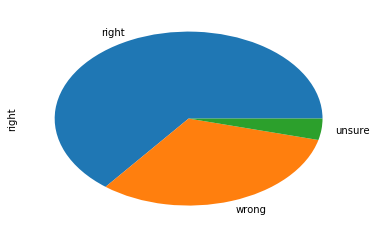

In [77]:
topic_tfidf = parallel(tfidf,topic)
give_result_global_info(topic_tfidf)

wrong: 30.693069306930692%
right: 65.34653465346535%
unsure: 3.9603960396039604%


['wrong', 'right', 'unsure']

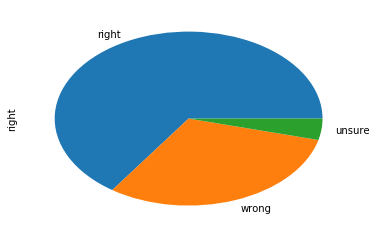

In [80]:
topic_dssm = parallel(dssm_result,topic)
give_result_global_info(topic_dssm)